# Credit Card Fraud Detection Using Machine Learning Algorithms

The objective of the project is to to detect all the fraudulent transactions while minimising incorrect fraud classification using various machine-learning techniques.


The dataset for the project is obtained from Kaggle - https://www.kaggle.com/mlg-ulb/creditcardfraud.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data are not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Initial Data Exploration

The initial data exploration takes a look at the dataset. Since the Time and Amount are the only non-anonymised features, we plot them to gain better understanding of their spread. A count of the fraud and non-fraud cases is done and visualised using barplot. In order to visualise the correlations between features, a heatmap is plotted.

In [1]:
#importing packages

%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#loading data

df = pd.read_csv('creditcard.csv')

In [3]:
#shape of df

print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data

df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
204335,135231.0,-3.362602,2.450981,0.001085,-0.496155,-2.502538,-0.070797,-2.730771,-0.053932,0.003478,...,2.725770,-0.367666,0.633558,0.492820,-0.658212,0.256636,-0.921749,-0.168947,0.90,0
37191,38845.0,1.258284,-0.097942,-0.266986,0.033487,-0.278892,-1.032337,0.217197,-0.232445,0.228593,...,-0.104388,-0.441862,-0.115279,-0.078975,0.432956,1.039893,-0.119146,-0.004172,49.95,0
75393,56044.0,1.157287,-0.274661,-0.406979,0.109011,1.576024,3.839989,-1.042122,1.019957,0.327054,...,0.074169,0.015604,-0.076174,0.994534,0.486438,-0.350152,0.057641,0.040670,45.00,0
187494,127557.0,-0.938366,-1.035749,1.826098,-3.120250,-0.525943,-0.247032,-0.534834,0.268648,-2.292205,...,-0.236268,-0.812110,0.094405,0.637402,0.213428,-0.491148,-0.012456,0.068153,70.00,0
51908,45182.0,0.794235,-2.525821,0.707013,-0.706443,-2.073278,0.725427,-1.152673,0.024305,-0.620588,...,-0.292360,-0.722904,-0.370336,-0.391973,0.394229,-0.200889,0.039133,0.084765,365.00,0


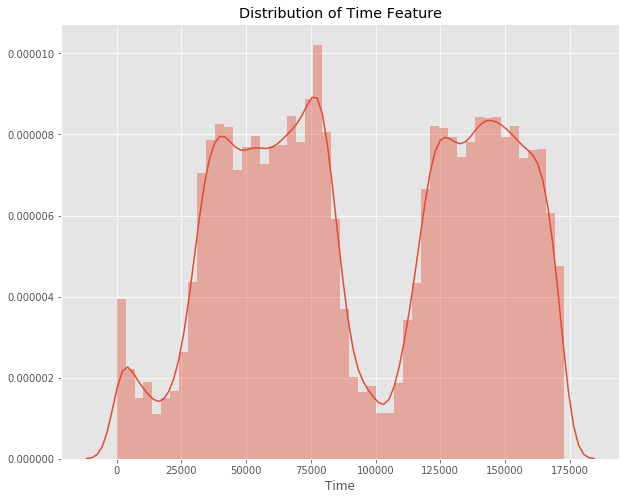

In [5]:
#visualizations of time and amount

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

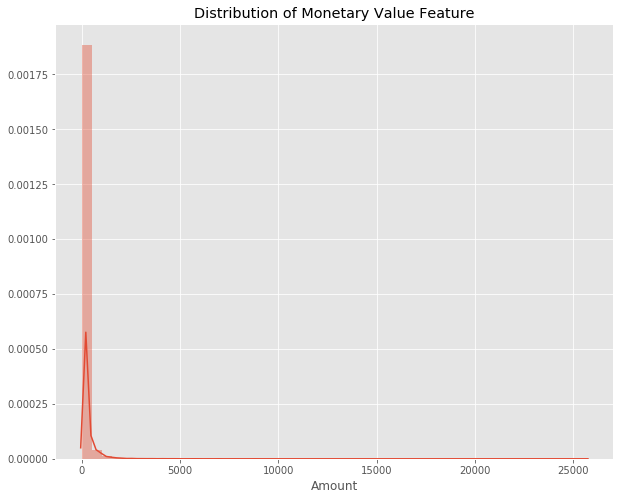

In [6]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [7]:
#count of fraud vs. normal transactions 

counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

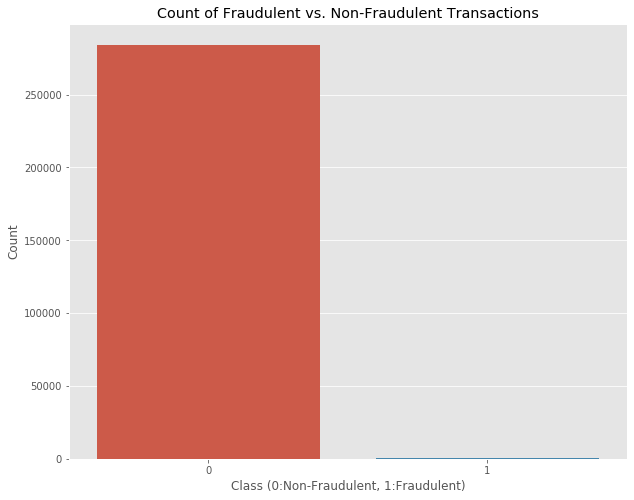

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1, 'Heatmap of Correlation')

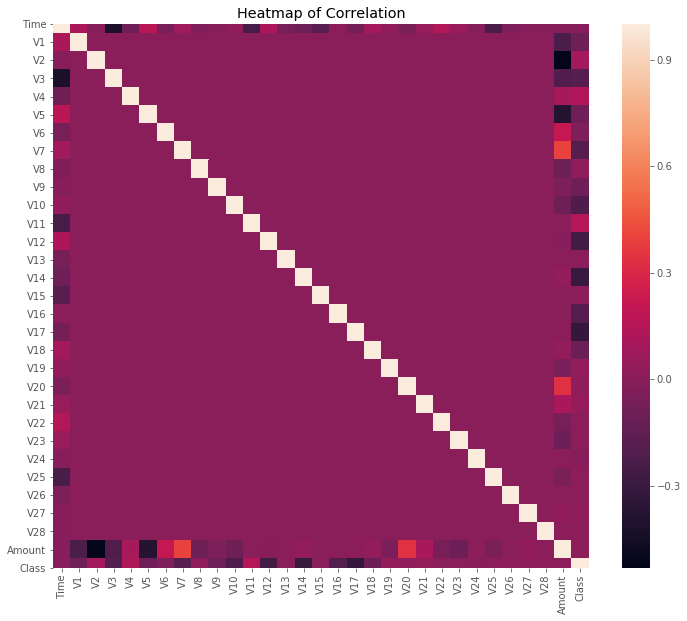

In [9]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

### Scaling Amount and Time

Anonymised features appear to have been scaled and centred around zero but Amount and Time have not been scaled. For Logistic Regression to perform well, the features have to be scaled, so the code below scales Amount and Time features.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

In [11]:
#scaling Time feature

scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]    # making a flat list out of a list of lists
scaled_time = pd.Series(flat_list1)

In [12]:
#scaling Amount feature

scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [13]:
# adding the scaled features and dropping the unscaled features from the original dataframe

df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(5)



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
106011,-24.134830,-30.065013,-9.289103,7.088948,-0.541192,-4.342530,1.943013,-0.086303,-0.449030,-1.014904,...,-3.539113,-6.990494,1.445075,-2.112099,0.270117,1.467352,-3.903965,0,5.844644,-0.527161
170674,-1.174199,0.558117,0.670899,-0.948356,1.949755,-1.012001,0.868228,-0.076476,-0.615277,-1.503856,...,-1.138385,-0.227633,0.390764,0.680823,0.218096,-0.074244,0.078814,0,-0.346073,0.536790
218621,-1.395981,2.729611,-0.466431,4.404373,-0.124675,0.677622,-0.378905,1.295752,-1.931131,1.532994,...,0.698696,-0.123283,-0.599915,-0.214554,0.536177,0.340983,0.179854,0,-0.305092,0.980734
101019,1.197995,-1.325685,1.669061,-0.264010,-2.049512,0.744912,-1.890503,0.631849,0.804286,0.455122,...,0.824702,-0.024023,0.240230,0.265093,-0.038684,0.082043,0.011483,0,-0.314848,-0.570919
178853,-0.002968,0.350677,0.815334,0.774450,0.355921,0.396492,0.436654,0.237962,0.252133,-0.365201,...,-0.872723,0.322857,-0.558792,-0.934186,-1.150650,0.182490,0.119942,0,-0.168718,0.610683


### Random Undersampling

The present dataset is highly imbalanced with the fraud cases forming an extremely small percentage of the whole. This poses a problem in training the algorithms. To deal with this problem, the technique of random undersampling - removal of samples from majority class, is used. 

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

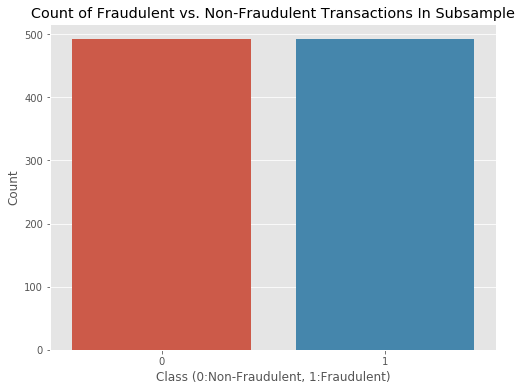

In [5]:

# undersampling with 1:1 ratio of legal and fraud transactions

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]



new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

### Outlier Detection and Removal

Here, features with high negative correlation and high positive correlation are identified. We then remove the outliers that lies outside 2.5 times the IQR in an attempt to eliminate the effect of outliers.

In [15]:
# correlation between features in the subsample

corr = under_sample.corr()
corr = corr[['Class']]

In [16]:
corr[corr.Class < -0.5] # features with high negative correlation

,Class
V3,-0.561846
V9,-0.547019
V10,-0.630836
V12,-0.687873
V14,-0.748655
V16,-0.589674
V17,-0.558472


In [17]:
corr[corr.Class > 0.5]  # features with high positive correlation

,Class
V4,0.702842
V11,0.676578
Class,1.000000


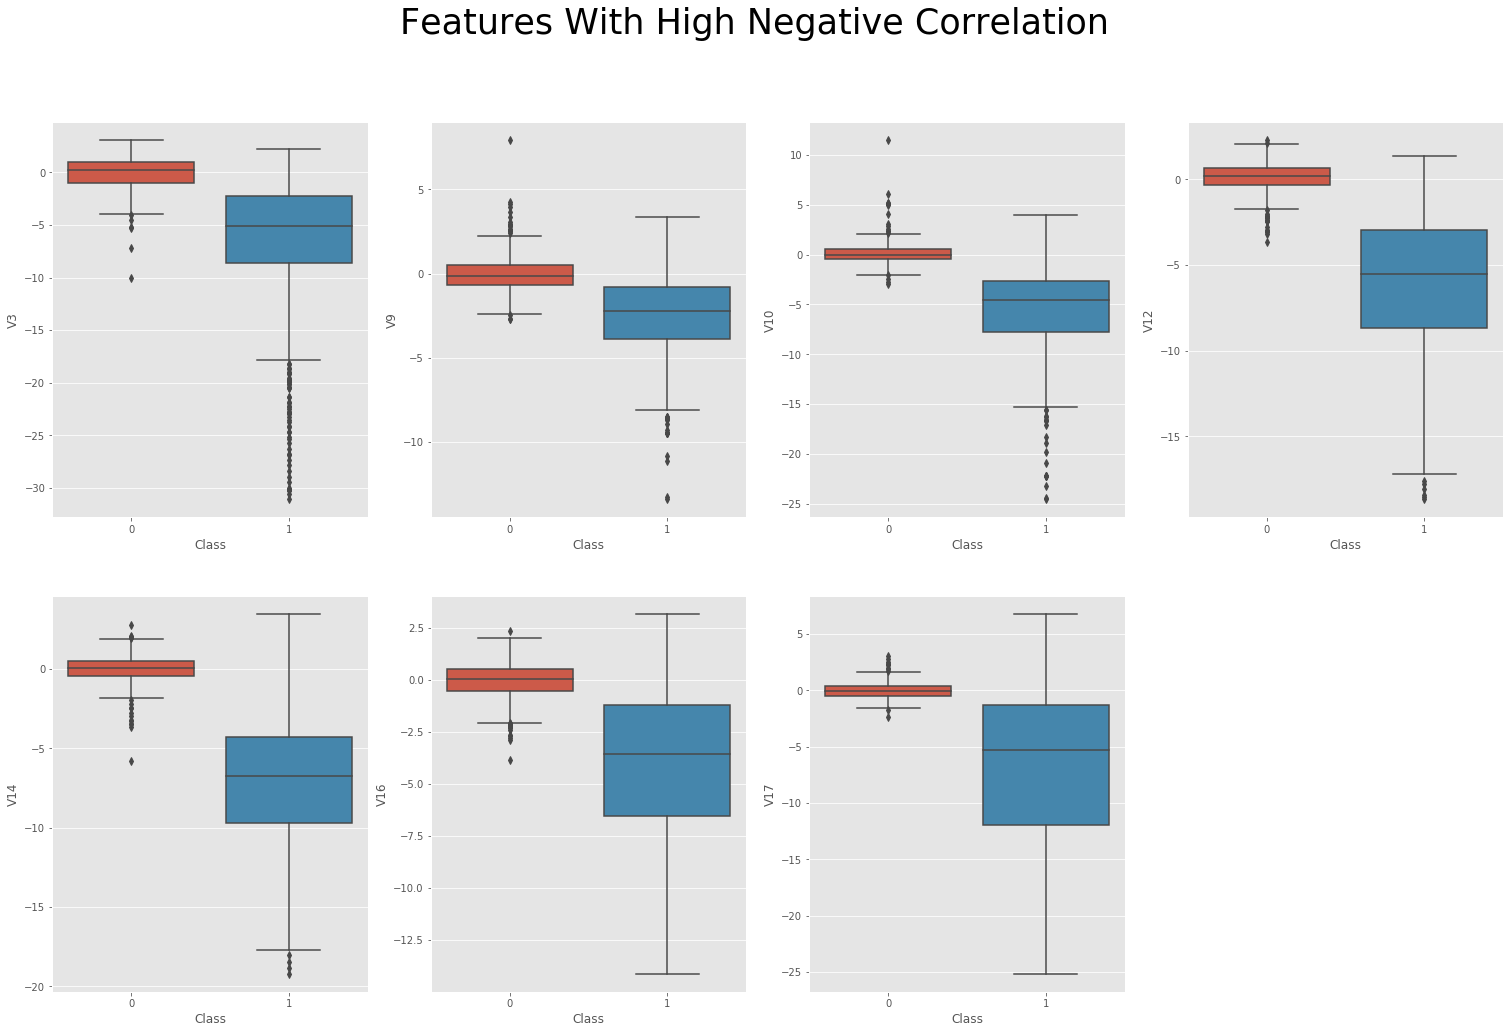

In [18]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=under_sample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=under_sample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=under_sample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=under_sample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=under_sample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=under_sample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=under_sample, ax=axes[1,2])
f.delaxes(axes[1,3])

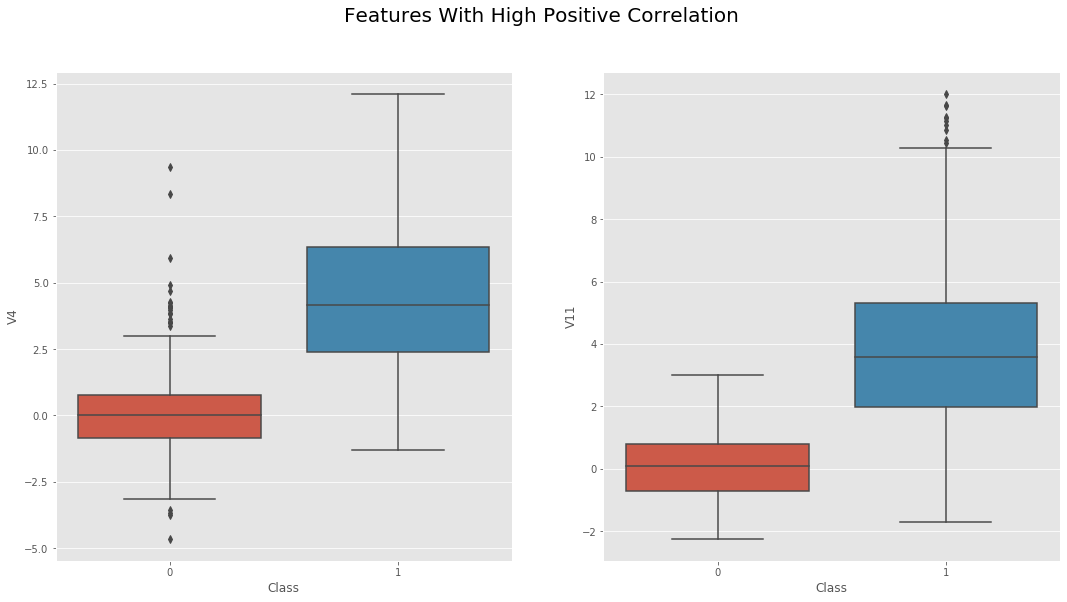

In [19]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=under_sample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=under_sample, ax=axes[1])

In [20]:
# removing extreme outliers
Q1 = under_sample.quantile(0.25)
Q3 = under_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]



In [21]:
len_after = len(df2)
len_before = len(under_sample)
len_difference = len(under_sample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'
      .format(len_before, len_difference, len_after))

We reduced our data size from 984 transactions by 283 transactions to 701 transactions.


In [22]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Splitting the data to evaluate performance

After removing extreme outliers, the dataset is now split into training set and testing set for further processes.

In [23]:
X = df2.drop('Class', axis=1)
y = df2['Class']

from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


## Classification Algorithms

### Parameter Tuning

Three algorithms - Logistic Regression, Support Vector Machine and Random Forest are used to solve the problem. A comparative study is then followed by evaluating each algorithm with respect to selected performance metrics.
Simple logistic regression is used. For the parameters of Support Vector Machine and Random Forest, Grid Search technique is employed to tune the parameters.

In [24]:
#importing relevant packages

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score



In [25]:
# paramter tuning for Support Vector Machine

def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_svm = svc_param_selection(X_under_train,y_under_train)

print(best_params_svm)



{'C': 1, 'gamma': 0.01}


In [26]:
# parameter tuning for Random Forest

def rf_param_selection(X, y):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params = rf_param_selection(X_under_train,y_under_train)

print(best_params)



{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


### Evaluating Algorithms

The evaluation and comparison of algorithms is performed using K-fold cross validation. F1 score and ROC-AUC are used as performance metrics. The mean of each parameter across the k sets is displayed.

In [27]:
# comparison of the three algorithms


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9417289740156083
ROC-AUC: 0.9764369190088591


Support Vector Machine:

F1 Score: 0.9449582896667241
ROC-AUC: 0.9746091815822785


Random Forest:

F1 Score: 0.9389315959918747
ROC-AUC: 0.9748561688120374




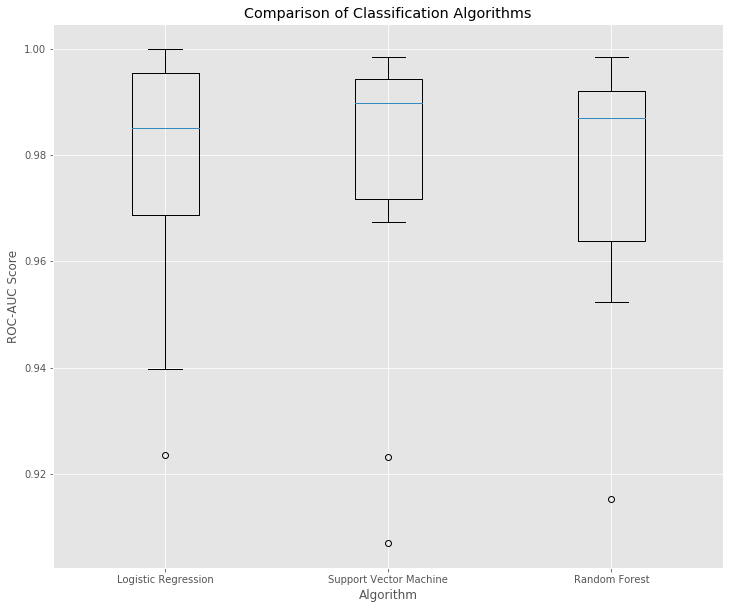

In [28]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### Using different Undersampling Ratios for evaluating performance

The technique of undersampling is used for handling the problem of imbalanced dataset. We previously evaluated the algorithms on 1:1 undersampling ratio dataset. Now we model the dataset with the real-world scenario, where the percentage of fraud is usually small. We now observe the performance of each algorithm with different undersampling ratios - 15%, 10%, 5% and 2%. Each time we remove the extreme outliers as before and then evaluate the performance with K-fold cross validation.

### 15% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

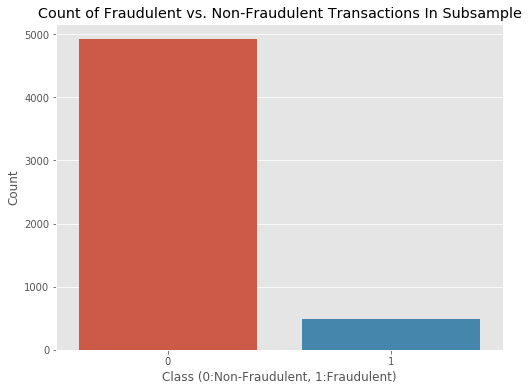

In [29]:
# 15% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')




#### Comparison of the various algorithms

In [30]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [31]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9483888705356218
ROC-AUC: 0.9790940348495056


Support Vector Machine:

F1 Score: 0.9470707735922618
ROC-AUC: 0.9477316166369295


Random Forest:

F1 Score: 0.945497030661252
ROC-AUC: 0.9706116291276057




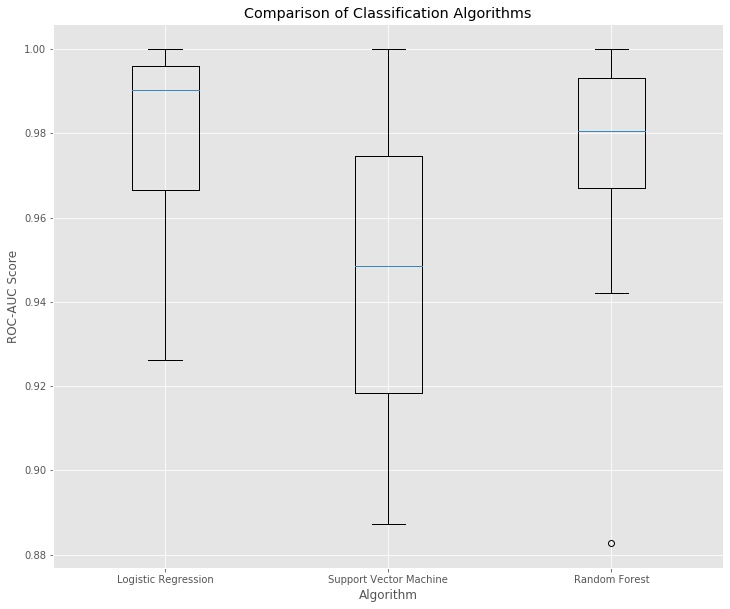

In [32]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### 10% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

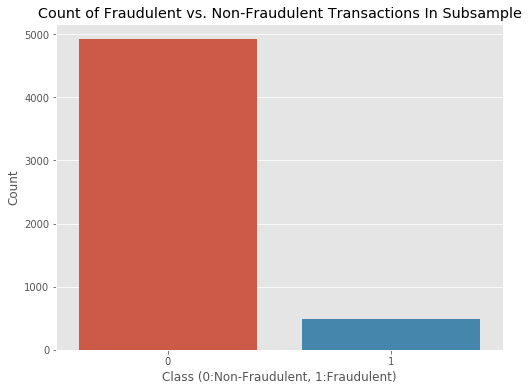

In [33]:
# 10% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')



#### Comparison of various algorithms

In [34]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [35]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9464015558742502
ROC-AUC: 0.976520788492542


Support Vector Machine:

F1 Score: 0.9318473337825932
ROC-AUC: 0.9435276734077966


Random Forest:

F1 Score: 0.9424781703697327
ROC-AUC: 0.9648468669901963




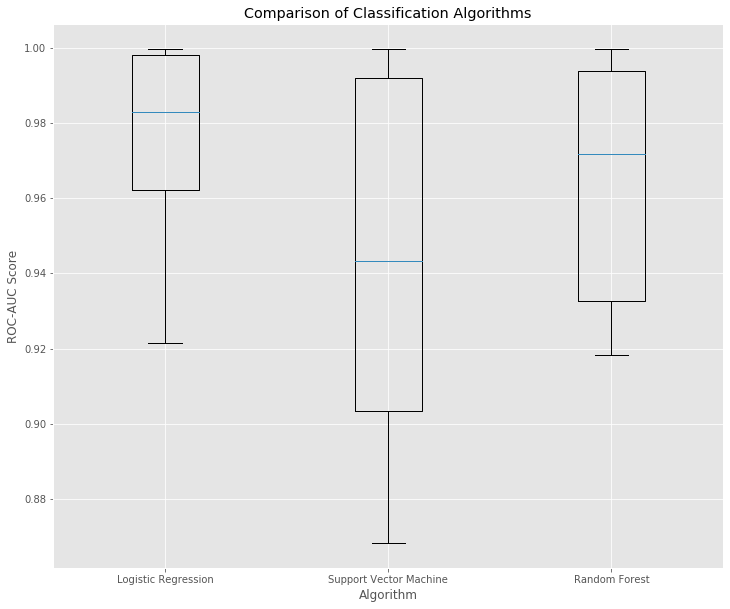

In [36]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### 5% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

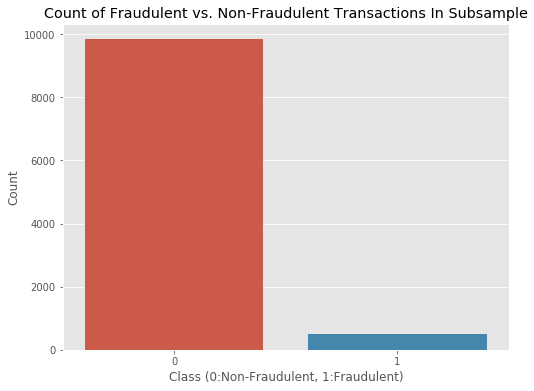

In [37]:
# 5% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.05), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')



#### Comparison of various algorithms

In [38]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [39]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9320538324319477
ROC-AUC: 0.9796717388981522


Support Vector Machine:

F1 Score: 0.9210385883103365
ROC-AUC: 0.9382960038967644


Random Forest:

F1 Score: 0.9370188109080274
ROC-AUC: 0.9722795116902363




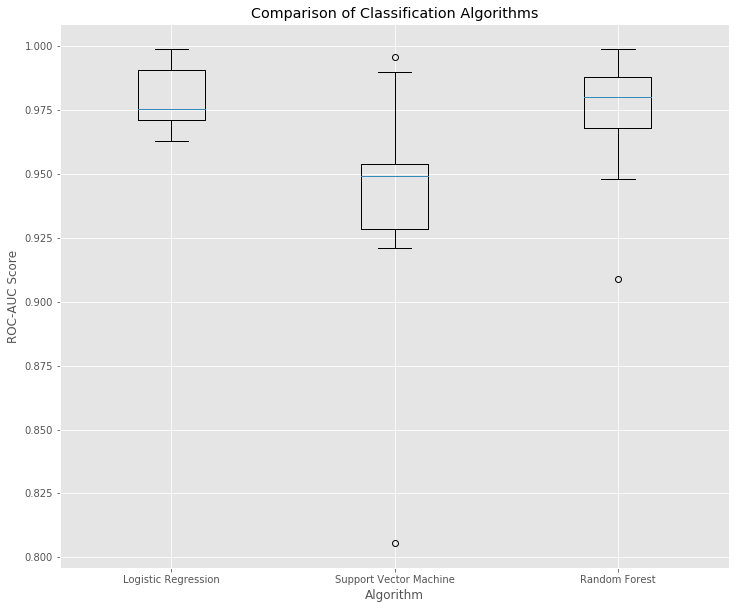

In [40]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

## Conclusion


As we can observe above, as the ratio of fraud cases decreases the ROC-AUC and F1 score of Logistic Regression and Support Vector Machine show a downward trend whereas those of Random Forest show better performance. The F-score of Random Forest is better than the other two with decreasing ratio of fraud cases. This is an important performance indicator as it shows that the system is correctly classifying frauds as well as minimising errors in incorrect classification, both of which are extremely relevant to the real world scenario.
The performance of Random Forest can be further explored if the features are not anonymised and with further tuning of the hyperparameters. The tuning here is done by Grid Search whereas in further study, tuning can be improved by using Random Search followed by Grid Search to obtain better hyperparameters.